## Network Science Lab 4

In [1]:
#Run this cell 1st to import numpy, matplotlib, and networkx
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


**1)** Consider the following code:
```
G1 = nx.Graph()

edges = [[1,2],[1,3],[1,2],[2,4],[3,4],[5,6]]

G1.add_edges_from(edges)

G2 = G1

G2.add_edge(6,7)

G1.add_edge(8,9)
```

What will G1 and G2 be after this code has run? Check your conclusion by running the code and explain any discrepancies between what you expected and what you see.

In [4]:
G1 = nx.Graph()

edges = [[1,2],[1,3],[1,2],[2,4],[3,4],[5,6]]

G1.add_edges_from(edges)

G2 = G1 # References the same thing in memory

G2.add_edge(6,7)

G1.add_edge(8,9)

G1.edges

EdgeView([(1, 2), (1, 3), (2, 4), (3, 4), (5, 6), (6, 7), (8, 9)])

**2)** Consider the configuration model applied to the degree sequence below. Develop a numerical test of the theoretical result that the expected number of links between 2 nodes is $k_i k_j/(K-1)$. You do not need to check each distinct pair of nodes, but try a few. 

In [52]:
k = np.array([3, 5, 2, 2, 3, 2, 1, 1, 1]) #Degree sequence
#Add code here
def first_nezero(q:list):
    for index in range(len(q)):
        if q[index] != 0:
            return index

def nezero_index(q:list):
    return [index for index in range(len(q)) if q[index] != 0]

def config_model(deg_sequence) -> nx.Graph:
    from random import choice
    seq, N = list(deg_sequence), len(k)
    G = nx.MultiGraph()
    G.add_nodes_from(range(N))
    while seq != [0 for _ in range(N)]:
       index = first_nezero(seq)
       seq[index] -= 1
       rd = choice(nezero_index(seq))
       seq[rd] -= 1
       G.add_edge(index, rd)
    return G

In [53]:
G = config_model(k)
print([G.degree(i) == k[i] for i in range(len(k))])

[True, True, True, True, True, True, True, True, True]


In [54]:
K = np.sum(k)

from itertools import product

l = range(len(k))
for e in product(l, l):
    i, j = e
    print(np.abs(G.number_of_edges(i, j) - (G.degree(i) * G.degree(j)) / K))

0.45
0.25
0.3
0.3
0.45
0.3
0.85
0.15
0.85
0.25
0.25
0.5
1.5
0.75
0.5
0.25
0.25
0.25
0.3
0.5
0.8
0.2
0.3
0.2
0.1
0.1
0.1
0.3
1.5
0.2
0.2
0.3
0.2
0.1
0.1
0.1
0.45
0.75
0.3
0.3
0.55
0.7
0.15
0.15
0.15
0.3
0.5
0.2
0.2
0.7
0.2
0.1
0.9
0.1
0.85
0.25
0.1
0.1
0.15
0.1
0.05
0.05
0.05
0.15
0.25
0.1
0.1
0.15
0.9
0.05
0.05
0.05
0.85
0.25
0.1
0.1
0.15
0.1
0.05
0.05
0.05


**3.** In lecture 6 it is stated that the diameter in Barabasi-Albert graphs scales as $log(log(N))$ when $m>1$ Check if this also applies to the average path length. Set $m=2$, and choose parameters in a sensible manner so that the computational time does not become excessive

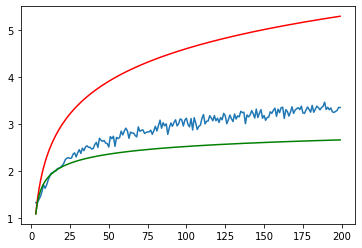

In [70]:
#Add code here

def avg_path_barabasi(N:int):
    G = nx.random_graphs.barabasi_albert_graph(N, 2)
    return nx.average_shortest_path_length(G)

x = range(3, 200)
y = [avg_path_barabasi(i) for i in x]

y1 = [np.log(i) for i in x]
y2 = [np.log(np.log(i)) + 1 for i in x]

plt.figure()
plt.plot(x, y)
plt.plot(x, y1, "r")
plt.plot(x, y2, "g")
plt.show()